In [2]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
np.random.seed(100)
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

N = 10000

#disegna numeri casuali che seguono la distribuzione normale standard
snrn = np.random.standard_normal(N)

#corregge il primo momento (valore atteso) a 0.0
snrn -= snrn.mean()
round(snrn.mean(), 4)

<ipython-input-2-1926999bcc04>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


-0.0

In [3]:
#corregge il secondo momento (deviazione standard) a 1.0
snrn /= snrn.std()
round(snrn.std(), 4)

1.0

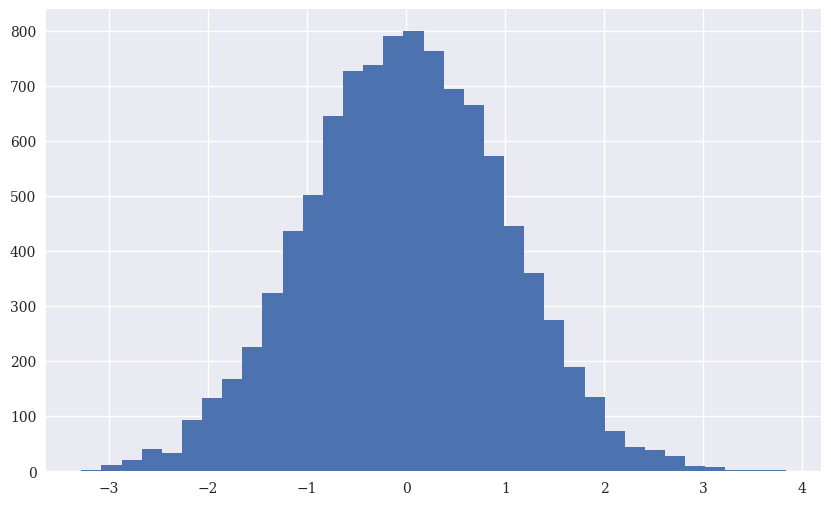

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(snrn, bins=35);

In [5]:
#insieme di numeri con solo tre valori discreti
numbers = np.ones(N) * 1.5
split = int(0.25 * N)
numbers[split:3 * split] = -1
numbers[3 * split:4 * split] = 0

#Corregge il primo momeneto (valore atteso) a 0.0
numbers -= numbers.mean()
round(numbers.mean(), 4)

0.0

In [6]:
#corregge il secondo momento (deviazione standard) a 1.0
numbers /= numbers.std()
round(numbers.std(), 4) 

1.0

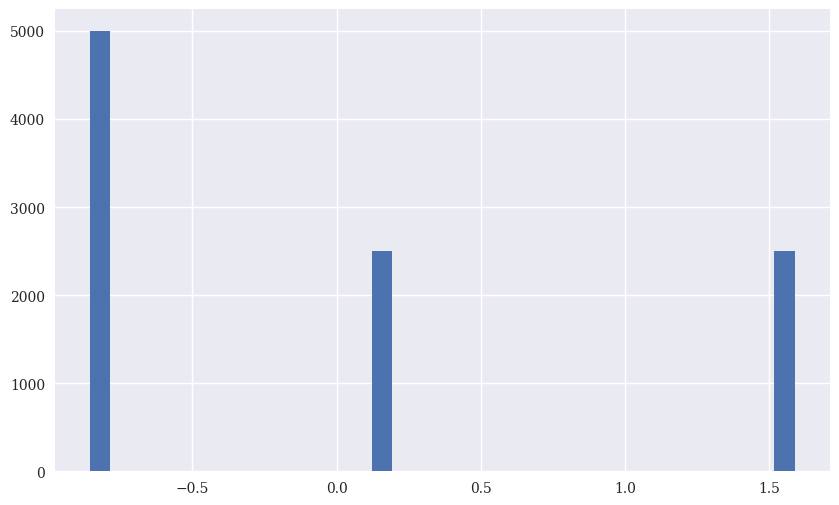

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(numbers, bins=35);

In [8]:
import math
import scipy.stats as scs
import statsmodels.api as sm

def dN(x, mu, sigma):
    ''' Probability density function of a normal random variable x.
    '''
    z = (x - mu) / sigma
    pdf = np.exp(-0.5 * z ** 2) / math.sqrt(2 * math.pi * sigma ** 2)
    return pdf

def return_histogram(rets, title=''):
    ''' Plots a histogram of the returns.
    '''
    plt.figure(figsize=(10, 6))
    x = np.linspace(min(rets), max(rets), 100)
    #disegna l'istogramma dei dati
    plt.hist(np.array(rets), bins=50, density=True, label='frequency')
    #disegna la PDF della distribuzione normale corrispondente
    y = dN(x, np.mean(rets), np.std(rets))
    plt.plot(x, y, linewidth=2, label='PDF')
    plt.xlabel('log returns')
    plt.ylabel('frequency/probability')
    plt.title(title)
    plt.legend()

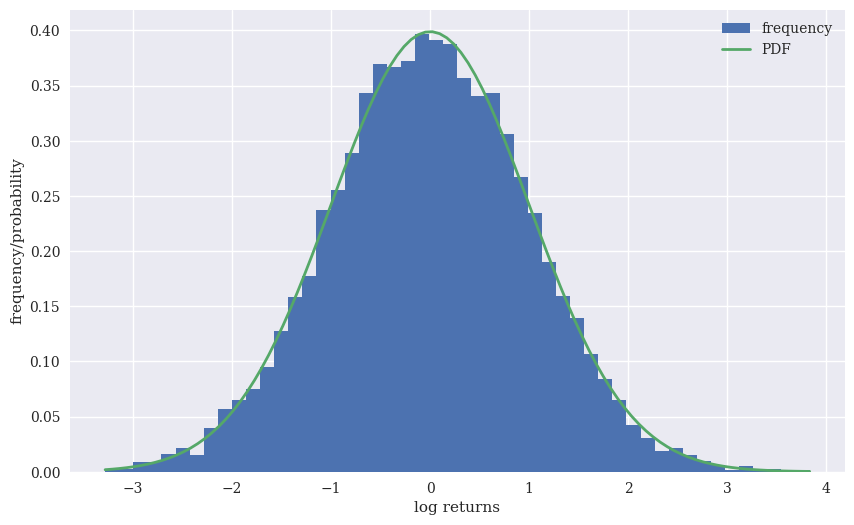

In [9]:
return_histogram(snrn)

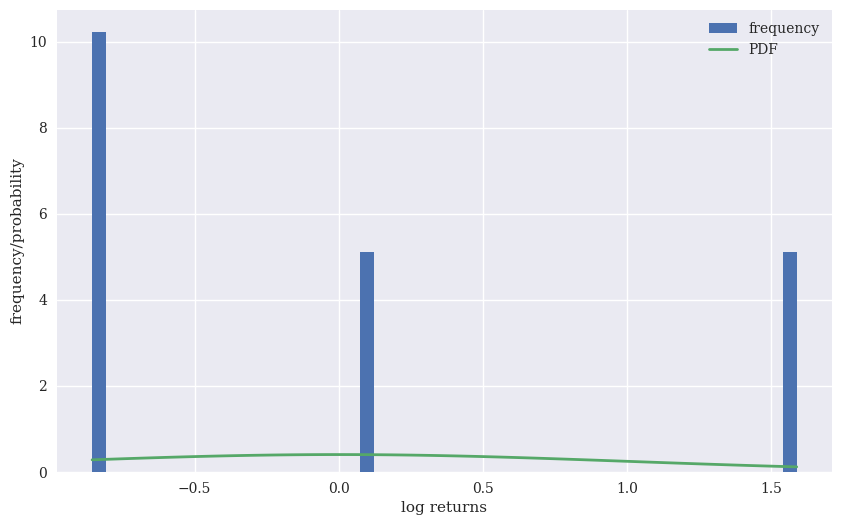

In [10]:
return_histogram(numbers)

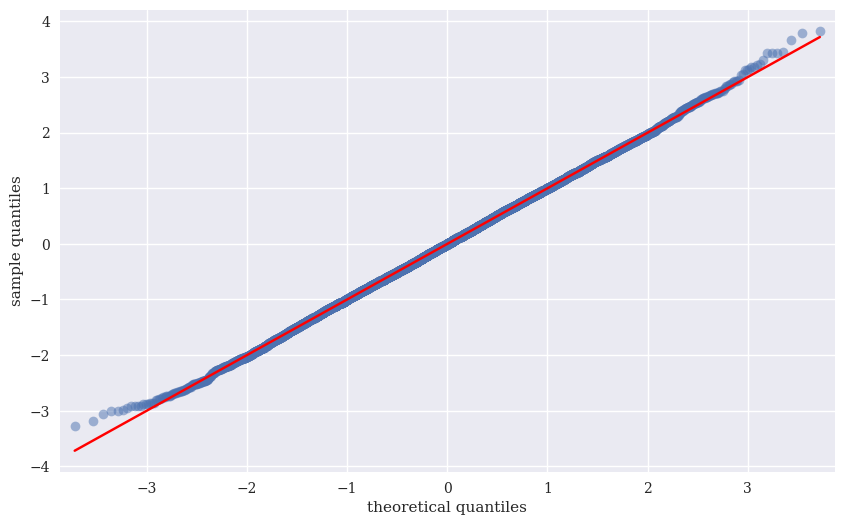

In [11]:
def return_qqplot(rets, title=''):
    ''' Generates a Q-Q plot of the returns.
    '''
    fig = sm.qqplot(rets, line='s', alpha=0.5)
    fig.set_size_inches(10, 6)
    plt.title(title)
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles')

return_qqplot(snrn)

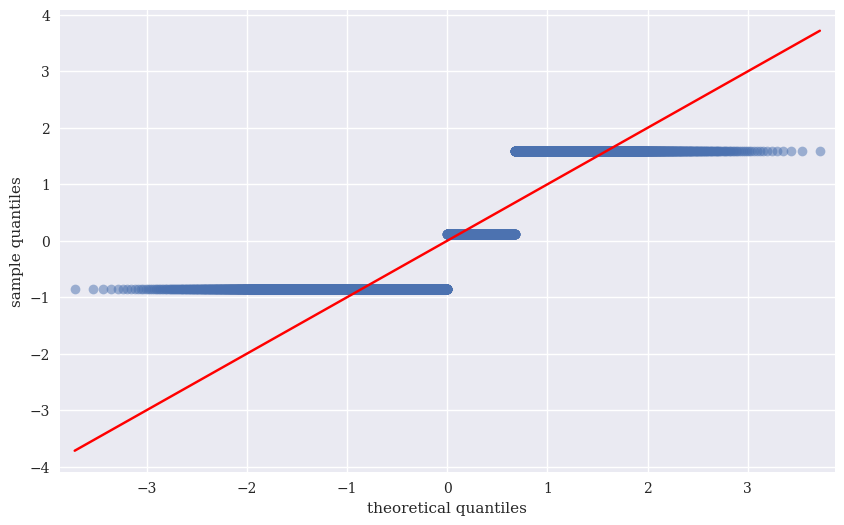

In [12]:
return_qqplot(numbers)

In [13]:
def print_statistics(rets):
    print('RETURN SAMPLE STATISTICS')
    print('---------------------------------------------')
    print('Skew of Sample Log Returns {:9.6f}'.format(
                scs.skew(rets)))
    print('Skew Normal Test p-value   {:9.6f}'.format(
                scs.skewtest(rets)[1]))
    print('---------------------------------------------')
    print('Kurt of Sample Log Returns {:9.6f}'.format(
                scs.kurtosis(rets)))
    print('Kurt Normal Test p-value   {:9.6f}'.format(
                scs.kurtosistest(rets)[1]))
    print('---------------------------------------------')
    print('Normal Test p-value        {:9.6f}'.format(
                scs.normaltest(rets)[1]))
    print('---------------------------------------------')

print_statistics(snrn)

RETURN SAMPLE STATISTICS
---------------------------------------------
Skew of Sample Log Returns  0.016793
Skew Normal Test p-value    0.492685
---------------------------------------------
Kurt of Sample Log Returns -0.024540
Kurt Normal Test p-value    0.637637
---------------------------------------------
Normal Test p-value         0.707334
---------------------------------------------


In [14]:
print_statistics(numbers)

RETURN SAMPLE STATISTICS
---------------------------------------------
Skew of Sample Log Returns  0.689254
Skew Normal Test p-value    0.000000
---------------------------------------------
Kurt of Sample Log Returns -1.141902
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------


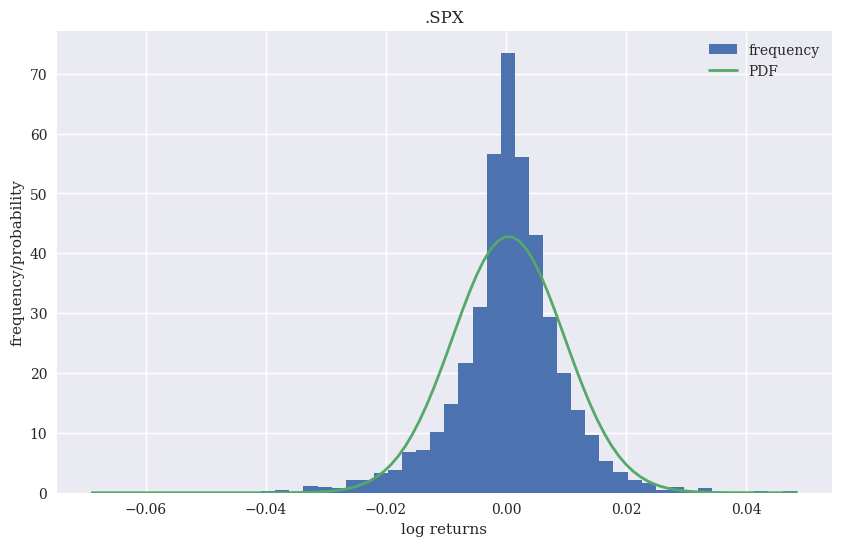

In [15]:
raw = pd.read_csv('http://hilpisch.com/aiif_eikon_eod_data.csv',
                  index_col=0, parse_dates=True).dropna()
rets = np.log(raw / raw.shift(1)).dropna()
symbol = '.SPX'
return_histogram(rets[symbol].values, symbol)

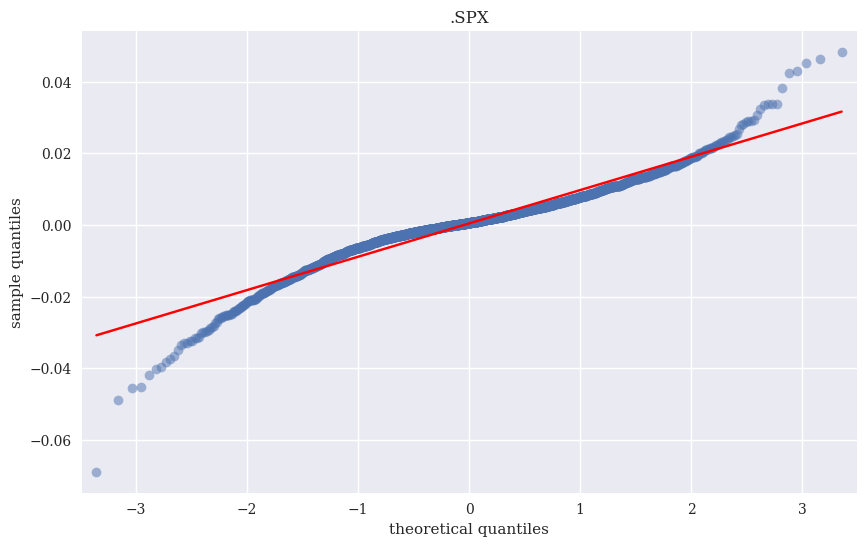

In [16]:
return_qqplot(rets[symbol].values, symbol)

In [17]:
symbols = ['.SPX', 'AMZN.O', 'EUR=', 'GLD']
for sym in symbols:
    print('\n{}'.format(sym))
    print(45 * '=')
    print_statistics(rets[sym].values)


.SPX
RETURN SAMPLE STATISTICS
---------------------------------------------
Skew of Sample Log Returns -0.497160
Skew Normal Test p-value    0.000000
---------------------------------------------
Kurt of Sample Log Returns  4.598167
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------

AMZN.O
RETURN SAMPLE STATISTICS
---------------------------------------------
Skew of Sample Log Returns  0.135268
Skew Normal Test p-value    0.005689
---------------------------------------------
Kurt of Sample Log Returns  7.344837
Kurt Normal Test p-value    0.000000
---------------------------------------------
Normal Test p-value         0.000000
---------------------------------------------

EUR=
RETURN SAMPLE STATISTICS
---------------------------------------------
Skew of Sample Log Returns -0.053959
Skew Normal Test p-value    0.268203
---------------------------------------------
K